In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\anderson-tests
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\anderson-tests
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import scipy.stats

64 -6.5 178
64 -3.5 185
64 -3.0 479
64 -2.5 192
64 -2.0 474
64 -1.5 191
512 -5.5 145
512 -4.5 171
512 -4.0 468
512 -3.5 190
512 -3.0 472
512 -2.5 185
512 -2.0 479
512 -1.5 188
1024 -6.0 243
1024 -5.0 347
1024 -4.0 496
1024 -3.0 551
\includegraphics{notebooks/anderson-tests/p-005.pdf}


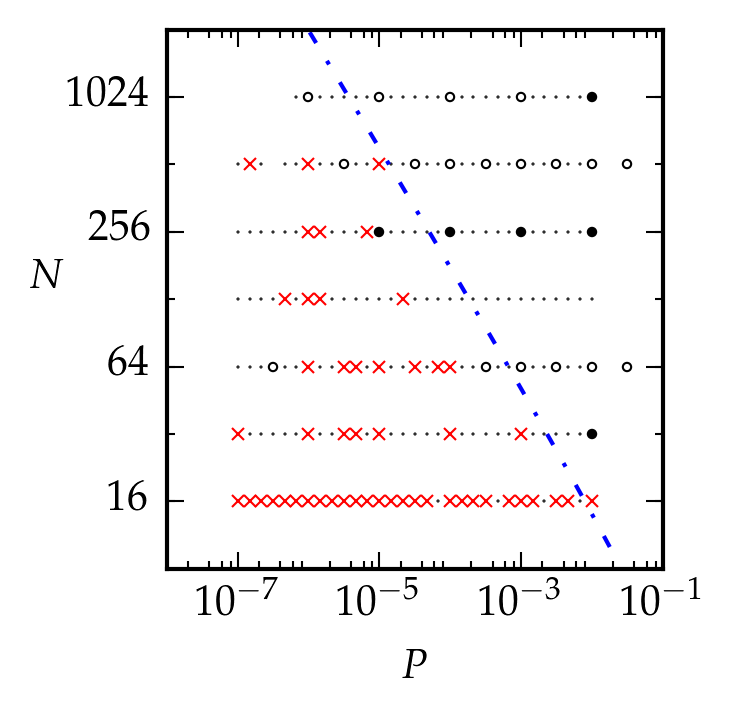

In [4]:
halffig()

entries = []

Ns = [16,32,64,128,256,512,1024,2048]
lPs = sorted(unique(datalP))

for iN,N in enumerate(Ns):
    for ilP,lP in enumerate(unique(datalP)):
        thisNPmask = (dataN == N) * (datalP == lP)
        if sum(thisNPmask) < 3:
            continue

        d = summ[thisNPmask]["gamma_min"]
        A2, critical, sig = scipy.stats.anderson(d/mean(d), 'expon')
        
        # tresh = 5%, dus critical[2]
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
        tresh = A2 > critical[2]
        fc = "white"
        if tresh:
            symbol = "x"
            color = "r"
            size = 3
        else:
            if sum(thisNPmask) > 100:
                if sum(thisNPmask) > 900:
                    fc = "k"
                else:
                                    print N,lP,sum(thisNPmask)
                symbol = "o"
                size = 2
            else:
                symbol = "."
                size = 0.5
            color = "k"
            
        entries.append([10**lP, N, symbol, fc, color, size])
        plot(10**lP,N,symbol,color=fc,mec=color,ms=size)
        #if A2 > critical[2]:
        #    # distinguishable
        #    kleurtjes[iN, ilP] = -log10(sum(thisNPmask))
        #else:
        #    kleurtjes[iN, ilP] = log10(sum(thisNPmask))
        #unlikeliness = sum(A2 > critical)

loglog()
gca().set_yscale('log', basey=2)

N = logspace(1,5)
#plot(1/N**2, N, "b:")
plot(1/(N**2 * log(N)**(-0.7)), N, "b-.")

axis(xmin=1e-8, xmax=1e-1, ymin=8, ymax=2048)
xticks([1e-7, 1e-5, 1e-3, 1e-1])
yticks([16,64,256,1024], map(str, [16,64,256,1024]))

ylabel("$N$", rotation='horizontal')
xlabel("$P$")

savefig('p-005.pdf')

import pickle
pickle.dump(entries, open('anderson-data.pickle', 'wb'))